In [6]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_excel(r"C:\Users\lavan\OneDrive\Desktop\Great learning\Data Mining\Graded Project Data\Clustering Clean Ads_Data-2.xlsx")

In [8]:
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [9]:
df.shape

(23066, 19)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [11]:
# List of numerical column names
numerical_columns = ['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions', 'Matched_Queries', 
                     'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue', 'CTR', 'CPM', 'CPC']

# Iterate through the numerical columns and count outliers using the IQR method
for column_name in numerical_columns:
    # Calculate the quartiles
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers
    num_outliers = ((df[column_name] < lower_bound) | (df[column_name] > upper_bound)).sum()

    # Print the column name and the count of outliers
    print(f"Number of outliers in '{column_name}': {num_outliers}")


Number of outliers in 'Ad - Length': 0
Number of outliers in 'Ad- Width': 0
Number of outliers in 'Ad Size': 8448
Number of outliers in 'Available_Impressions': 2378
Number of outliers in 'Matched_Queries': 3192
Number of outliers in 'Impressions': 3269
Number of outliers in 'Clicks': 1691
Number of outliers in 'Spend': 2081
Number of outliers in 'Fee': 3517
Number of outliers in 'Revenue': 2325
Number of outliers in 'CTR': 44
Number of outliers in 'CPM': 34
Number of outliers in 'CPC': 412


In [12]:
from scipy import stats

# List of numerical column names
numerical_columns = [
    'Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions',
    'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee',
    'Revenue', 'CTR', 'CPM', 'CPC'
]

# Iterate through numerical columns and calculate skewness
for column_name in numerical_columns:
    skewness = stats.skew(df[column_name].dropna())
    print(f"Skewness for {column_name}: {skewness:.2f}")


Skewness for Ad - Length: 0.33
Skewness for Ad- Width: 0.21
Skewness for Ad Size: 1.21
Skewness for Available_Impressions: 3.07
Skewness for Matched_Queries: 2.98
Skewness for Impressions: 2.97
Skewness for Clicks: 2.94
Skewness for Spend: 2.58
Skewness for Fee: -2.30
Skewness for Revenue: 2.79
Skewness for CTR: 0.75
Skewness for CPM: 0.75
Skewness for CPC: 1.85


In [13]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Identify datetime column
datetime_col = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()

# Identify categorical columns (excluding numerical and datetime)
categorical_cols = df.select_dtypes(exclude=['number', 'datetime64[ns]']).columns.tolist()

# Count the number of numerical, datetime, and categorical columns
num_numerical_cols = len(numerical_cols)
num_datetime_cols = len(datetime_col)
num_categorical_cols = len(categorical_cols)

print("Numerical Columns:")
print(numerical_cols)
print("\nNumber of Numerical Columns:", num_numerical_cols)

print("\nDatetime Columns:")
print(datetime_col)
print("\nNumber of Datetime Columns:", num_datetime_cols)

print("\nCategorical Columns:")
print(categorical_cols)
print("\nNumber of Categorical Columns:", num_categorical_cols)



Numerical Columns:
['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions', 'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue', 'CTR', 'CPM', 'CPC']

Number of Numerical Columns: 13

Datetime Columns:
[]

Number of Datetime Columns: 0

Categorical Columns:
['Timestamp', 'InventoryType', 'Ad Type', 'Platform', 'Device Type', 'Format']

Number of Categorical Columns: 6


In [14]:
import pandas as pd

# Assuming df is your DataFrame
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d-%H')


In [15]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Identify datetime column
datetime_col = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()

# Identify categorical columns (excluding numerical and datetime)
categorical_cols = df.select_dtypes(exclude=['number', 'datetime64[ns]']).columns.tolist()

# Count the number of numerical, datetime, and categorical columns
num_numerical_cols = len(numerical_cols)
num_datetime_cols = len(datetime_col)
num_categorical_cols = len(categorical_cols)

print("Numerical Columns:")
print(numerical_cols)
print("\nNumber of Numerical Columns:", num_numerical_cols)

print("\nDatetime Columns:")
print(datetime_col)
print("\nNumber of Datetime Columns:", num_datetime_cols)

print("\nCategorical Columns:")
print(categorical_cols)
print("\nNumber of Categorical Columns:", num_categorical_cols)



Numerical Columns:
['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions', 'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue', 'CTR', 'CPM', 'CPC']

Number of Numerical Columns: 13

Datetime Columns:
['Timestamp']

Number of Datetime Columns: 1

Categorical Columns:
['InventoryType', 'Ad Type', 'Platform', 'Device Type', 'Format']

Number of Categorical Columns: 5


In [16]:
# Calculate the median for each column
median_ctr = df['CTR'].median()
median_cpm = df['CPM'].median()
median_cpc = df['CPC'].median()

# Impute missing values with the respective medians
df['CTR'].fillna(median_ctr, inplace=True)
df['CPM'].fillna(median_cpm, inplace=True)
df['CPC'].fillna(median_cpc, inplace=True)


In [17]:
# Find and count null records in each column
null_counts = df.isnull().sum()

# Display the columns with their respective counts of null records
print("Null Records per Column:")
print(null_counts)

Null Records per Column:
Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Timestamp              23066 non-null  datetime64[ns]
 1   InventoryType          23066 non-null  object        
 2   Ad - Length            23066 non-null  int64         
 3   Ad- Width              23066 non-null  int64         
 4   Ad Size                23066 non-null  int64         
 5   Ad Type                23066 non-null  object        
 6   Platform               23066 non-null  object        
 7   Device Type            23066 non-null  object        
 8   Format                 23066 non-null  object        
 9   Available_Impressions  23066 non-null  int64         
 10  Matched_Queries        23066 non-null  int64         
 11  Impressions            23066 non-null  int64         
 12  Clicks                 23066 non-null  int64         
 13  S

In [19]:
import pandas as pd

# Assuming you have a DataFrame named 'df' and a list of numerical column names 'numerical_columns'
# Define the list of numerical column names
numerical_columns = ['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions', 'Matched_Queries', 
                     'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue', 'CTR', 'CPM', 'CPC']

# Function to treat outliers using IQR
def treat_outliers_with_iqr(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outlier values with the lower or upper bound
    data[column_name] = data[column_name].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    
# Treat outliers in each numerical column
for column_name in numerical_columns:
    treat_outliers_with_iqr(df, column_name)

# Now, your DataFrame 'df' has outliers treated using the IQR method


In [20]:
# List of numerical column names
numerical_columns = ['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions', 'Matched_Queries', 
                     'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue', 'CTR', 'CPM', 'CPC']

# Iterate through the numerical columns and count outliers using the IQR method
for column_name in numerical_columns:
    # Calculate the quartiles
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers
    num_outliers = ((df[column_name] < lower_bound) | (df[column_name] > upper_bound)).sum()

    # Print the column name and the count of outliers
    print(f"Number of outliers in '{column_name}': {num_outliers}")


Number of outliers in 'Ad - Length': 0
Number of outliers in 'Ad- Width': 0
Number of outliers in 'Ad Size': 0
Number of outliers in 'Available_Impressions': 0
Number of outliers in 'Matched_Queries': 0
Number of outliers in 'Impressions': 0
Number of outliers in 'Clicks': 0
Number of outliers in 'Spend': 0
Number of outliers in 'Fee': 0
Number of outliers in 'Revenue': 0
Number of outliers in 'CTR': 0
Number of outliers in 'CPM': 0
Number of outliers in 'CPC': 0


In [21]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [22]:
# Creating an object for the StandardScaler function
X = StandardScaler()

In [23]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select the numerical columns from your DataFrame
numerical_columns = df.select_dtypes(include=['number'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler to your numerical DataFrame
scaled_data = scaler.fit_transform(numerical_columns)

# Create a new DataFrame with the scaled values rounded to two decimal places
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns.columns).round(2)

In [24]:
scaled_df

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.36,-0.43,-0.10,-0.76,-0.78,-0.77,-0.87,-0.89,0.54,-0.88,-1.09,-1.34,-1.08
1,-0.36,-0.43,-0.10,-0.76,-0.78,-0.77,-0.87,-0.89,0.54,-0.88,-1.08,-1.34,-1.08
2,-0.36,-0.43,-0.10,-0.75,-0.78,-0.77,-0.87,-0.89,0.54,-0.88,-1.09,-1.34,-1.08
3,-0.36,-0.43,-0.10,-0.76,-0.78,-0.77,-0.87,-0.89,0.54,-0.88,-1.11,-1.34,-1.08
4,-0.36,-0.43,-0.10,-0.76,-0.78,-0.77,-0.87,-0.89,0.54,-0.88,-1.07,-1.34,-1.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,1.43,-0.19,1.65,-0.76,-0.78,-0.77,-0.87,-0.89,0.54,-0.88,0.11,0.00,-0.51
23062,1.43,-0.19,1.65,-0.76,-0.78,-0.77,-0.87,-0.89,0.54,-0.88,0.11,0.00,-0.51
23063,1.43,-0.19,1.65,-0.76,-0.78,-0.77,-0.87,-0.89,0.54,-0.88,0.11,0.00,-0.51
23064,-1.13,1.29,-0.30,-0.76,-0.78,-0.77,-0.87,-0.89,0.54,-0.88,0.11,0.00,-0.51


In [25]:
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 2,random_state=1)

In [26]:
# Fit K means on the scaled_df
k_means.fit(scaled_df)

KMeans(n_clusters=2, random_state=1)

In [27]:
# Get the labels
k_means.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [28]:
round(k_means.inertia_,2)

187995.72

In [29]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(scaled_df)
round(k_means.inertia_,2)

299736.35

In [30]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
round(k_means.inertia_,2)

137392.97

In [31]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
round(k_means.inertia_,2)

101342.1

In [32]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled_df)
round(k_means.inertia_,2)

68237.25

In [34]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(scaled_df)
round(k_means.inertia_,2)

58665.03

In [35]:
k_means = KMeans(n_clusters = 7,random_state=1)
k_means.fit(scaled_df)
round(k_means.inertia_,2)

51343.67

In [37]:
k_means = KMeans(n_clusters = 8,random_state=1)
k_means.fit(scaled_df)
round(k_means.inertia_,2)

45667.84

In [39]:
k_means = KMeans(n_clusters = 9,random_state=1)
k_means.fit(scaled_df)
round(k_means.inertia_,2)

41304.77

In [40]:
k_means = KMeans(n_clusters = 10,random_state=1)
k_means.fit(scaled_df)
round(k_means.inertia_,2)

38700.17

In [41]:
wss =[] 

In [42]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(round(KM.inertia_,2))

In [43]:
wss

[299736.35,
 187995.72,
 137392.97,
 101342.1,
 68237.25,
 58665.03,
 51343.67,
 45667.84,
 41304.77,
 38700.17]

In [44]:
a=[1,2,3,4,5,6,7,8,9,10]

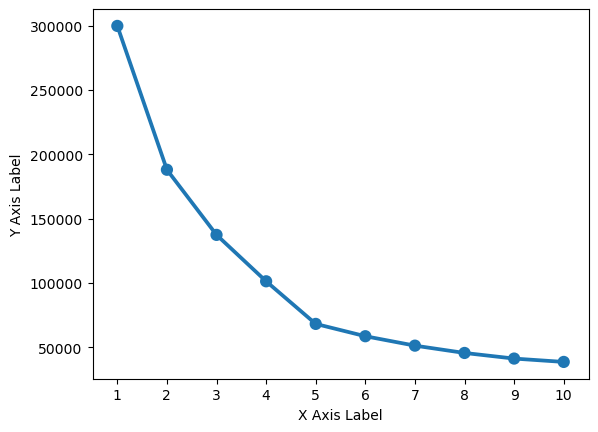

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'a' and 'wss' are your data arrays or Series
sns.pointplot(x=a, y=wss)

# Optionally, you can add labels to the axes
plt.xlabel("X Axis Label")
plt.ylabel("Y Axis Label")

# Display the plot
plt.show()


In [57]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [58]:
# Calculating silhouette_score
silhouette_score(scaled_df,labels,random_state=1)

0.4164486027813257

In [49]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [50]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [51]:
# Calculating silhouette_score
silhouette_score(scaled_df,labels,random_state=1)

0.4958236720012455

In [54]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [55]:
#from sklearn.metrics import silhouette_samples, silhouette_score

In [56]:
silhouette_score(scaled_df,labels,random_state=1)

0.4897070435908224

In [59]:
#from sklearn.metrics import silhouette_samples, silhouette_score

In [60]:
silhouette_score(scaled_df,labels,random_state=1)

0.4164486027813257

In [61]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
labels = k_means.labels_

In [63]:
df["Clus_kmeans"] = labels
df.head(5)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_kmeans
0,2020-09-02 17:00:00,Format1,300,250,75000.0,Inter222,Video,Desktop,Display,1806.0,325.0,323.0,1.0,0.0,0.35,0.0,0.0031,0.0,0.0,0
1,2020-09-02 10:00:00,Format1,300,250,75000.0,Inter227,App,Mobile,Video,1780.0,285.0,285.0,1.0,0.0,0.35,0.0,0.0035,0.0,0.0,0
2,2020-09-01 22:00:00,Format1,300,250,75000.0,Inter222,Video,Desktop,Display,2727.0,356.0,355.0,1.0,0.0,0.35,0.0,0.0028,0.0,0.0,0
3,2020-09-03 20:00:00,Format1,300,250,75000.0,Inter228,Video,Mobile,Video,2430.0,497.0,495.0,1.0,0.0,0.35,0.0,0.0020,0.0,0.0,0
4,2020-09-04 15:00:00,Format1,300,250,75000.0,Inter217,Web,Desktop,Video,1218.0,242.0,242.0,1.0,0.0,0.35,0.0,0.0041,0.0,0.0,0


In [64]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [65]:
silhouette_score(scaled_df,labels)

0.4958288804603155

In [66]:
sil_width = silhouette_samples(scaled_df,labels)

In [71]:
df["Clus_kmeans5"] = labels
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,...,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_kmeans,sil_width,Clus_kmeans5
0,2020-09-02 17:00:00,Format1,300,250,75000.0,Inter222,Video,Desktop,Display,1806.0,...,1.0,0.0,0.35,0.0,0.0031,0.0,0.0,0,0.104599,0
1,2020-09-02 10:00:00,Format1,300,250,75000.0,Inter227,App,Mobile,Video,1780.0,...,1.0,0.0,0.35,0.0,0.0035,0.0,0.0,0,0.103462,0
2,2020-09-01 22:00:00,Format1,300,250,75000.0,Inter222,Video,Desktop,Display,2727.0,...,1.0,0.0,0.35,0.0,0.0028,0.0,0.0,0,0.105323,0
3,2020-09-03 20:00:00,Format1,300,250,75000.0,Inter228,Video,Mobile,Video,2430.0,...,1.0,0.0,0.35,0.0,0.0020,0.0,0.0,0,0.106820,0
4,2020-09-04 15:00:00,Format1,300,250,75000.0,Inter217,Web,Desktop,Video,1218.0,...,1.0,0.0,0.35,0.0,0.0041,0.0,0.0,0,0.102304,0


In [69]:
# Silhouette Analysis
from sklearn.metrics import silhouette_score
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for num_clusters in range_n_clusters:
    
    # initialize K means
    kmeans=KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_df)
    cluster_labels=kmeans.labels_
    #Silhouette Score
    silhouette_avg = silhouette_score(scaled_df,cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.3680905237534154
For n_clusters=3, the silhouette score is 0.3559735758261143
For n_clusters=4, the silhouette score is 0.4164532592517519
For n_clusters=5, the silhouette score is 0.4958236720012455
For n_clusters=6, the silhouette score is 0.4897070435908224
For n_clusters=7, the silhouette score is 0.4847156688376856
For n_clusters=8, the silhouette score is 0.4471289178806727
For n_clusters=9, the silhouette score is 0.4432441152643572
For n_clusters=10, the silhouette score is 0.43329573288330275


In [73]:
df.Clus_kmeans5.value_counts().sort_index()

0    6141
1    4050
2    6706
3    4627
4    1542
Name: Clus_kmeans5, dtype: int64

In [74]:
df.head ()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,...,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_kmeans,sil_width,Clus_kmeans5
0,2020-09-02 17:00:00,Format1,300,250,75000.0,Inter222,Video,Desktop,Display,1806.0,...,1.0,0.0,0.35,0.0,0.0031,0.0,0.0,0,0.104599,0
1,2020-09-02 10:00:00,Format1,300,250,75000.0,Inter227,App,Mobile,Video,1780.0,...,1.0,0.0,0.35,0.0,0.0035,0.0,0.0,0,0.103462,0
2,2020-09-01 22:00:00,Format1,300,250,75000.0,Inter222,Video,Desktop,Display,2727.0,...,1.0,0.0,0.35,0.0,0.0028,0.0,0.0,0,0.105323,0
3,2020-09-03 20:00:00,Format1,300,250,75000.0,Inter228,Video,Mobile,Video,2430.0,...,1.0,0.0,0.35,0.0,0.0020,0.0,0.0,0,0.106820,0
4,2020-09-04 15:00:00,Format1,300,250,75000.0,Inter217,Web,Desktop,Video,1218.0,...,1.0,0.0,0.35,0.0,0.0041,0.0,0.0,0,0.102304,0


In [76]:
clust_profile=df.drop(['Timestamp','InventoryType','Clus_kmeans','sil_width','Clus_kmeans5'],axis=1)
clust_profile=df.groupby('Clus_kmeans5').mean()
clust_profile['freq']=df.Clus_kmeans5.value_counts().sort_index()
clust_profile

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_kmeans,sil_width,freq
Clus_kmeans5,,,,,,,,,,,,,,,,
0,424.903436,149.711773,64057.098192,1.848660e+06,8.822264e+05,8.432510e+05,3331.871356,1531.051212,0.349238,997.647976,0.015661,2.657790,0.463748,0.0,0.435067,6141
1,465.109136,199.587654,72996.207407,5.696500e+06,2.806626e+06,2.671750e+06,11255.924938,5740.641901,0.313259,3879.676560,0.013924,2.458773,0.641920,1.0,0.445973,4050
2,147.716672,563.726514,74068.595288,3.687644e+04,2.232337e+04,1.622806e+04,1921.532564,213.800895,0.349991,138.998507,0.127458,12.038981,0.121676,2.0,0.519161,6706
3,687.602334,303.447158,100906.851091,2.511389e+05,1.373969e+05,1.165686e+05,14170.121434,1253.085829,0.349555,816.005844,0.114663,10.332640,0.107597,3.0,0.537793,4627
4,142.038911,571.854734,73743.190661,8.042368e+05,5.655782e+05,4.770659e+05,30549.177610,6536.173865,0.305636,4464.700046,0.129439,14.046284,0.117873,4.0,0.641366,1542


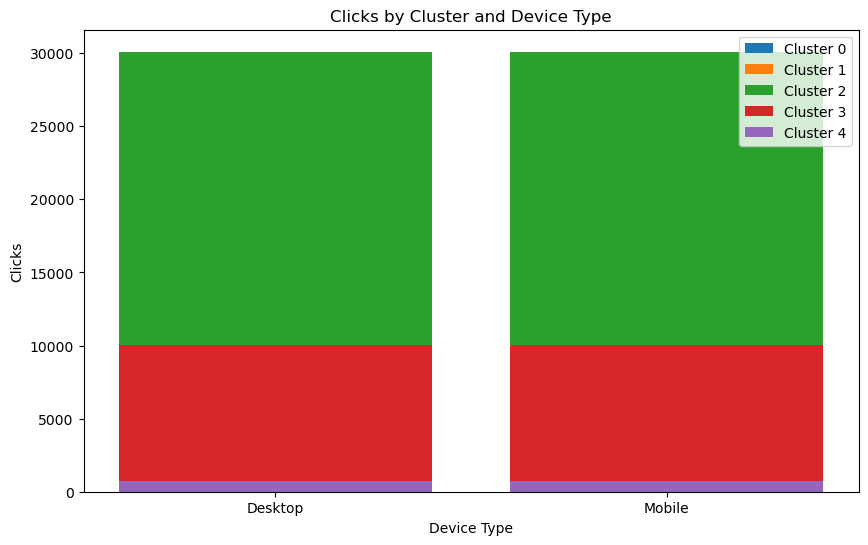

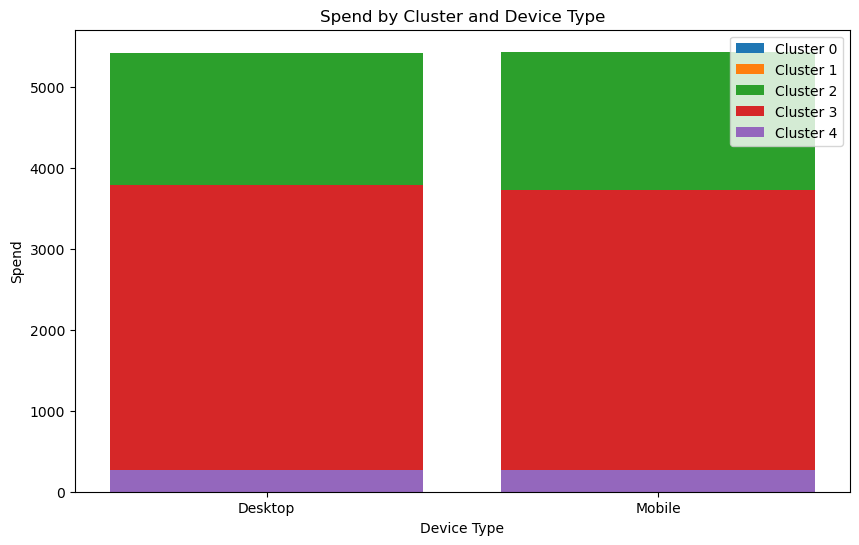

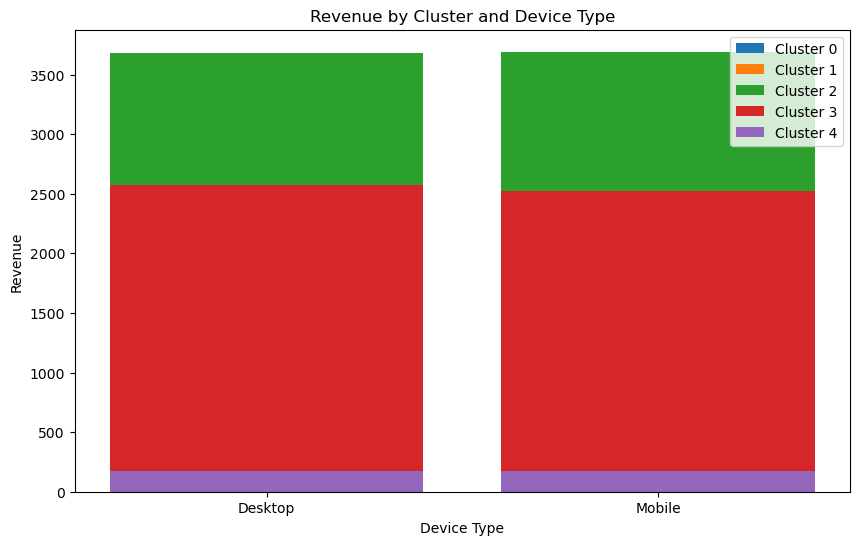

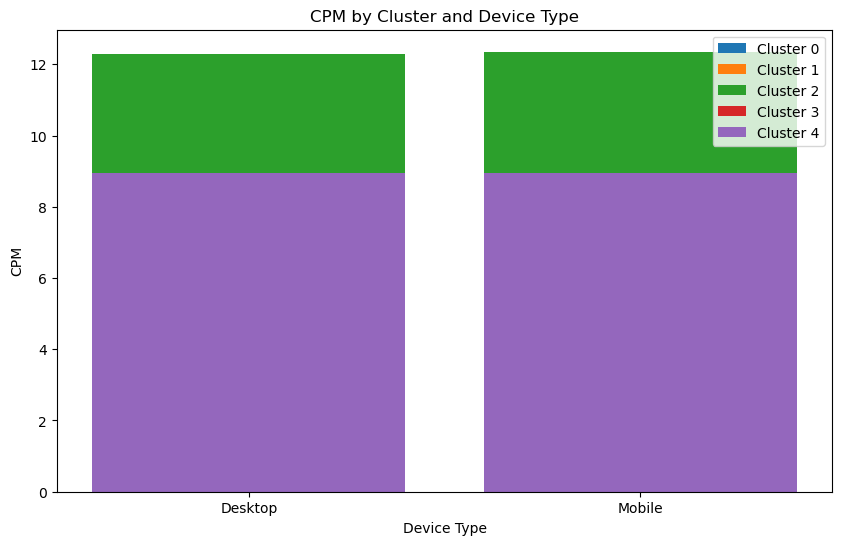

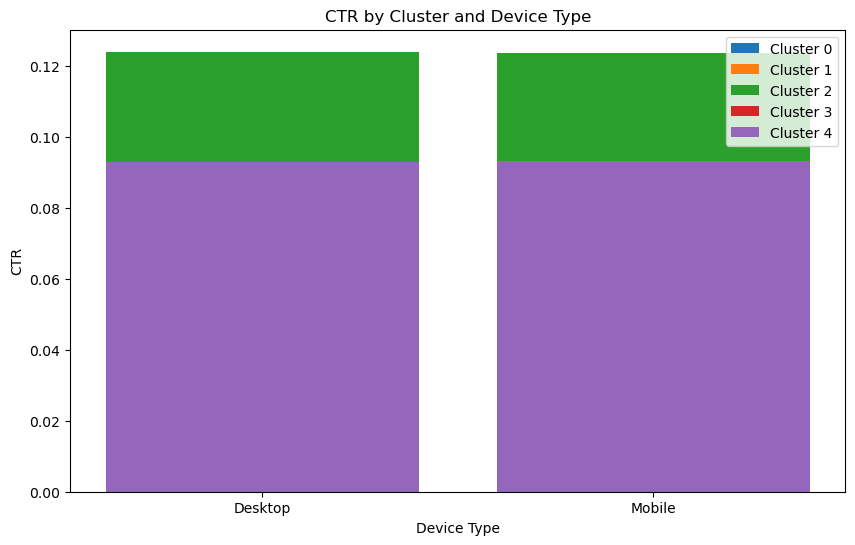

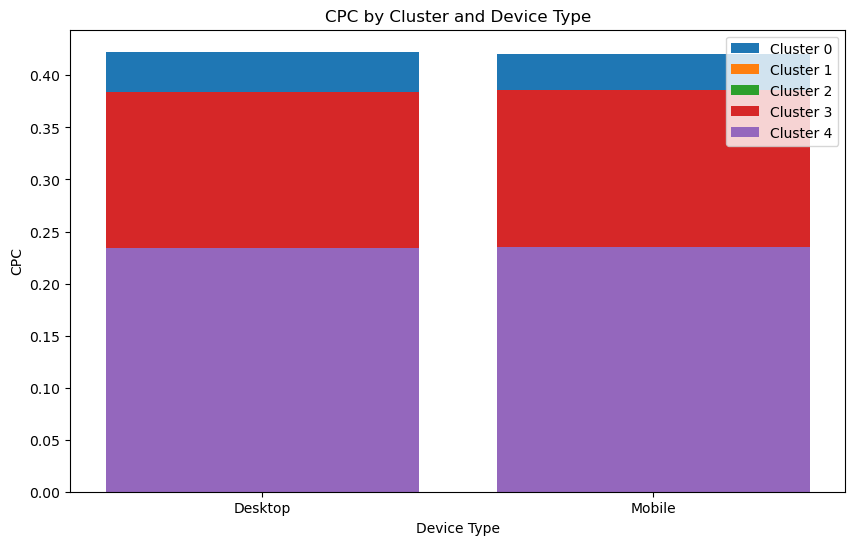

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have a DataFrame 'ad_data' with columns: 'Device Type', 'Clicks', 'Spend', 'Revenue', 'CPM', 'CTR', 'CPC'

# Step 1: Perform K-Means clustering
n_clusters = 5  # Optimal number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Clicks', 'Spend', 'Revenue', 'CPM', 'CTR', 'CPC']])

# Step 2: Group data by clusters and Device Type, calculate mean or sum
clustered_data = df.groupby(['Cluster', 'Device Type'])[['Clicks', 'Spend', 'Revenue', 'CPM', 'CTR', 'CPC']].mean().reset_index()

# Step 3: Create bar plots for each metric
metrics = ['Clicks', 'Spend', 'Revenue', 'CPM', 'CTR', 'CPC']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    for cluster in range(n_clusters):
        cluster_data = clustered_data[clustered_data['Cluster'] == cluster]
        plt.bar(cluster_data['Device Type'], cluster_data[metric], label=f'Cluster {cluster}')
    plt.xlabel('Device Type')
    plt.ylabel(metric)
    plt.title(f'{metric} by Cluster and Device Type')
    plt.legend()
    plt.show()


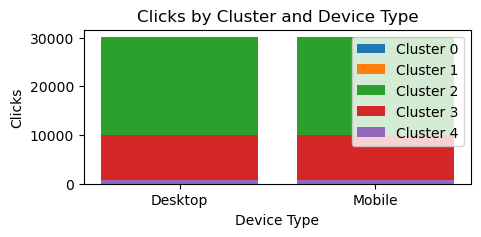

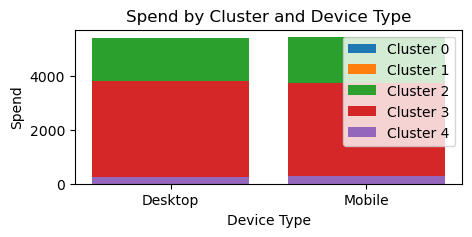

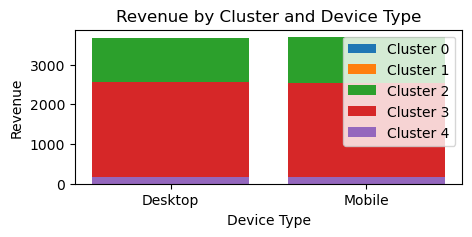

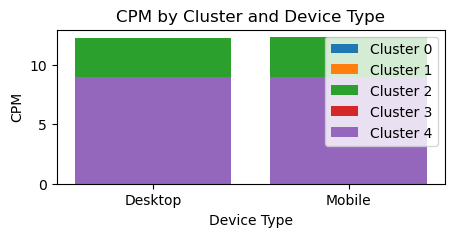

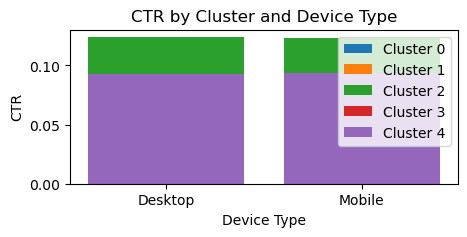

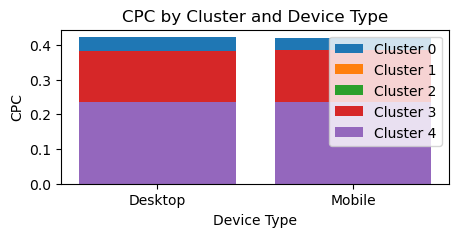

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have a DataFrame 'df' with columns: 'Device Type', 'Clicks', 'Spend', 'Revenue', 'CPM', 'CTR', 'CPC'

# Step 1: Perform K-Means clustering
n_clusters = 5  # Optimal number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Clicks', 'Spend', 'Revenue', 'CPM', 'CTR', 'CPC']])

# Step 2: Group data by clusters and Device Type, calculate mean or sum
clustered_data = df.groupby(['Cluster', 'Device Type'])[['Clicks', 'Spend', 'Revenue', 'CPM', 'CTR', 'CPC']].mean().reset_index()

# Step 3: Create separate bar plots for each metric
metrics = ['Clicks', 'Spend', 'Revenue', 'CPM', 'CTR', 'CPC']

for metric in metrics:
    plt.figure(figsize=(5, 2))
    for cluster in range(n_clusters):
        cluster_data = clustered_data[clustered_data['Cluster'] == cluster]
        plt.bar(cluster_data['Device Type'], cluster_data[metric], label=f'Cluster {cluster}')
    plt.xlabel('Device Type')
    plt.ylabel(metric)
    plt.title(f'{metric} by Cluster and Device Type')
    plt.legend()
    plt.show()


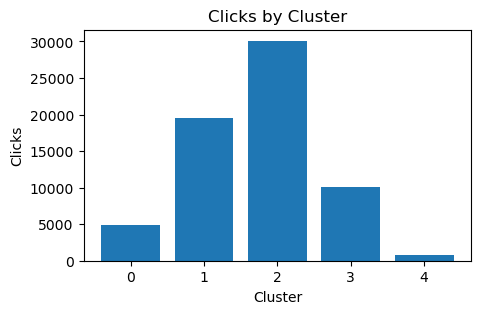

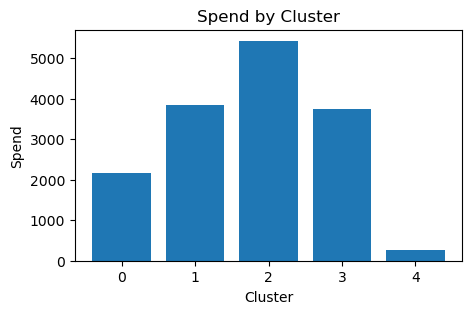

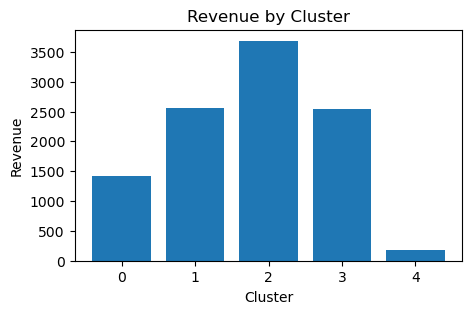

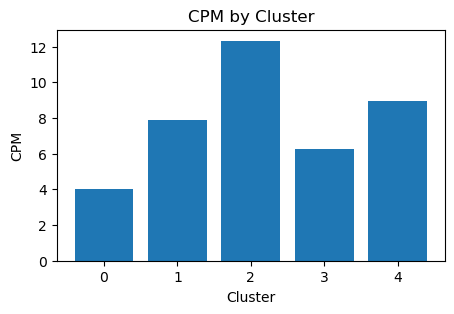

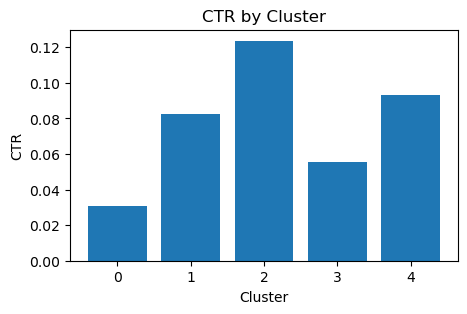

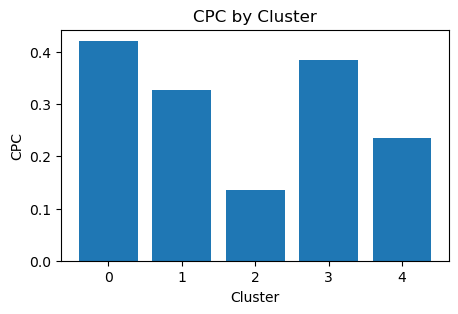

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have a DataFrame 'df' with columns: 'Device Type', 'Clicks', 'Spend', 'Revenue', 'CPM', 'CTR', 'CPC'

# Step 1: Perform K-Means clustering
n_clusters = 5  # Optimal number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Clicks', 'Spend', 'Revenue', 'CPM', 'CTR', 'CPC']])

# Step 2: Group data by clusters and calculate mean or sum for each metric
clustered_data = df.groupby('Cluster')[['Clicks', 'Spend', 'Revenue', 'CPM', 'CTR', 'CPC']].mean().reset_index()

# Step 3: Create bar plots for each metric
metrics = ['Clicks', 'Spend', 'Revenue', 'CPM', 'CTR', 'CPC']

for metric in metrics:
    plt.figure(figsize=(5, 3))
    plt.bar(clustered_data['Cluster'], clustered_data[metric])
    plt.xlabel('Cluster')
    plt.ylabel(metric)
    plt.title(f'{metric} by Cluster')
    plt.show()


In [84]:
import pandas as pd
from sklearn.cluster import KMeans

# Assuming you have a DataFrame 'df' with columns: 'Device Type', 'Clicks', 'Spend', 'Revenue', 'CPM', 'CTR', 'CPC'

# Step 1: Perform K-Means clustering
n_clusters = 5  # Optimal number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Clicks', 'Spend', 'Revenue', 'CPM', 'CTR', 'CPC']])

# Step 2: Group data by clusters and calculate mean or sum for each metric
clustered_data = df.groupby('Cluster')[['Clicks', 'Spend', 'Revenue', 'CPM', 'CTR', 'CPC']].mean()  # Use 'sum()' for sum instead of 'mean()' if needed

# Print the results for each metric within each cluster
metrics = ['Clicks', 'Spend', 'Revenue', 'CPM', 'CTR', 'CPC']

for metric in metrics:
    print(f"Cluster-wise {metric}:\n")
    print(clustered_data[[metric]])
    print("\n")


Cluster-wise Clicks:

               Clicks
Cluster              
0         4847.081844
1        19568.417388
2        30094.173775
3        10037.295817
4          722.903347


Cluster-wise Spend:

               Spend
Cluster             
0        2161.003026
1        3849.176103
2        5431.627452
3        3756.296768
4         267.238943


Cluster-wise Revenue:

             Revenue
Cluster             
0        1425.365618
1        2558.179555
2        3686.444682
3        2540.743125
4         173.711766


Cluster-wise CPM:

               CPM
Cluster           
0         4.048353
1         7.891003
2        12.332641
3         6.269979
4         8.954799


Cluster-wise CTR:

              CTR
Cluster          
0        0.030801
1        0.082769
2        0.123720
3        0.055735
4        0.093175


Cluster-wise CPC:

              CPC
Cluster          
0        0.421603
1        0.326716
2        0.134886
3        0.385245
4        0.235172


